In [4]:
# TEST
# To test any random code only use this cell

In [5]:
# Part of helper functions
# Descripton of the function given

# to convert the list of 1's and 0's use this function
# this funtion will give equvivalent decimal number of binary digits present in the list
# example [1, 0, 1, 0] = 10 (in decnimal) => 1010 equivalent binary

def get_list_of_decimal(lists_of_digits):
    '''
        type(list_of_digits) => <list<list<int>>> => binary digits list
        return type list<int> => decimal list
        
        example: list_of_digits = [[1, 0, 1, 0], [0, 1, 0, 0]]
        function returns [10, 8]
    '''
    decimal_number_correspond_to_topic = []
    for list_of_digits in lists_of_digits:
        decimal_num = int(''.join(map(str, list_of_digits)), 2)
        decimal_number_correspond_to_topic.append(decimal_num)
    return decimal_number_correspond_to_topic


# to convert dict to list
def to_list(sorted_dict):
    '''
        input sorted_dict = {a: 1, b: 3, i: 5, h: 10}
        return list => [a, b, i, h]
        why?
        The built in function returns in different order
        so created this new function to add in exact order becuase the dict is sorted
        based on the occurance of the key
    '''
    result = []
    for word in sorted_dict.keys():
        result.append(word)
    return result

In [6]:
# This import for regular expression to remove special chars from the data
import re

# load data file
# There are several demo data file in the same dir
data_file = open('./generate_test/test_original_2.txt', 'r')

# Refinfing to lower case as cricket and CriCkeT is same as per ours
data_file = [line.lower() for line in data_file.read().split('\n')]

# Finding all different words
# And removing special chars like ',' etc. As "Cricket" and "Cricket?" will be same word

all_words = []
for line in data_file:
    all_words.extend([re.sub('[^A-Za-z0-9 ]+', '', x) for x in line.split()])


In [7]:
# NOTE: Un comment code of this block only for set case (not good and efficient)
#       Problem with set approch is only the bit positioning
#       Set position data on random order so that any random bit change can affect in result
#       Especially when the bit is MSB the by just one word the value change is very high
#       Leads to false inteprestation of data and simillarity
#       To see the actual result uncomment this code and run

# making a set of vocab that our source file contains
# vocab means unique set of words
# vocab = set()

# for line in data_file:
#     for word in line:
#         if word == " " or word == "\n":
#             pass
#         else:
#             vocab.add(word)

# NOTE: With set approach

# topic_vs_vocab_array = []
# vocab_array = list(vocab)
# # Here topic is just line of data
# list_of_topics = data_file

# for topic in list_of_topics:
#     binary_list = []
#     for word in vocab_array:
#         if word in topic:
#             binary_list.append(1)
#         else:
#             binary_list.append(0)
#     topic_vs_vocab_array.append(binary_list)

# topic_vs_vocab_array

In [8]:
# ratheat then making just set of vocab
# making dict of the vocab 
# example: {'word': occurance}
# then sort the dict on the basis of occurance 
# thats how we can set the common appearance of the word in LSB of generating binary number
# and rare appearance of the word will be placeed in MSB

vocab_dict = dict()

for word in all_words:
    if word == " " or word == "\n":
        pass
    else:
        if word in vocab_dict:
            vocab_dict[word] += 1
        else:
            vocab_dict[word] = 1

# sorting the vocab_dict on the basis of value
# so that the most appearing word comes at the last (LSB)
# and the least appearing word comes at the first (MSB)
sorted_vocabs = dict(sorted(vocab_dict.items(), key=lambda item: item[1]))
topic_vs_vocab_array = []

# Here topic is just line of data
list_of_topics = data_file

for topic in list_of_topics:
    binary_list = []
    for word in sorted_vocabs.keys():
        if word in topic:
            binary_list.append(1)
        else:
            binary_list.append(0)
    topic_vs_vocab_array.append(binary_list)

In [9]:
# Represent data in better way using panda
import pandas as pd

# see the function description
decimal_list = get_list_of_decimal(topic_vs_vocab_array)

# Just setting the viewing window of data to max
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df_binary = pd.DataFrame(topic_vs_vocab_array, columns=to_list(sorted_vocabs), index=data_file)
df_decimal = pd.DataFrame(decimal_list, columns=['Decimal Numbers'], index=data_file)

# df_decimal.info()

In [10]:
# Run this cell to see the result in the binary vs. topic
df_binary

dates  back  16th  \
cricket is a popular sport played in many count...      0     0     0   
the indian premier league (ipl) is one of the b...      0     0     0   
the sport of cricket has a rich history that da...      1     1     1   
cricket can be played in different formats, inc...      0     0     0   
some of the most famous cricketers of all time ...      0     0     0   
the icc cricket world cup is one of the biggest...      0     0     0   
the sport of cricket has been evolving over the...      0     0     0   
cricket has a passionate fan base, with million...      0     0     0   
one of the unique features of cricket is the co...      0     0     0   
cricket is often described as a gentleman's spo...      0     0     0   
the game of cricket has produced many memorable...      0     0     0   
cricket is a complex game that requires a combi...      0     0     0   
the sport of cricket has faced several controve...      0     0     0   
the indian cricket team is one of the most succ...      0     0     0   
the sport of cricket has a wide range of termin...      0     0     0   
cricket has the ability to bring people from di...      0     1     0   
the sport of cricket has seen many innovations ...      0     0     0   
some of the most iconic moments in cricket hist...      0     0     0   
cricket is a sport that can be played in differ...      0     0     0   
cricket has a rich tradition of rivalries betwe...      0     0     0   
politics is the process of making decisions tha...      0     0     0   
the role of government is to ensure the welfare...      0     0     0   
political systems can vary greatly between diff...      0     0     0   
elections are an important part of the politica...      0     0     0   
political leaders have a responsibility to act ...      0     0     0   
political parties are organizations that repres...      0     0     0   
political campaigns can be expensive, with cand...      1     0     0   
political debates are an important part of the ...      1     0     0   
political leaders must be able to communicate e...      0     0     0   
the media plays an important role in shaping pu...      0     0     0   
political systems can be affected by factors su...      0     0     0   
the political landscape is constantly evolving,...      0     0     0   
political polarization can be a major problem i...      0     0     0   
the principles of democracy, including freedom ...      0     0     0   
political systems can be prone to corruption, w...      0     0     0   
political systems can be prone to corruption, w...      0     0     0   
the united nations is an international organiza...      0     0     0   
political leaders must be able to balance compe...      0     0     0   
political activism is an important way for citi...      0     0     0   
political stability is crucial for economic gro...      0     0     0   
entertainment is a form of activity that is des...      0     0     0   
the entertainment industry includes a wide rang...      0     0     0   
entertainment can be a powerful tool for bringi...      0     0     0   
the rise of streaming services like netflix and...      0     0     0   
the music industry is constantly evolving, with...      0     0     0   
actors and actresses have the ability to bring ...      0     0     0   
reality television has become a popular form of...      0     0     0   
the film industry is a major contributor to the...      0     0     0   
social media has changed the way that we consum...      0     0     0   
entertainment can be a form of escapism, allowi...      0     0     0   
the entertainment industry can be competitive a...      0     0     0   
live events like concerts and festivals can be ...      0     0     0   
entertainment can be used to educate and inform...      0     0     0   
the gaming industry is a rapidly growing sector...      0     0     0   
entertainment can be a powerful tool 

In [11]:
# Run this cell to see the result in the decimal vs. topic
df_decimal

Decimal Numbers
cricket is a popular sport played in many count...  2338402619848543497548224224781408271529424823...
the indian premier league (ipl) is one of the b...  1202453802380202612679414065556140558016355935...
the sport of cricket has a rich history that da...  2610649462292973643479063952846693797050416092...
cricket can be played in different formats, inc...  2166148198531886609045636081361784143309716465...
some of the most famous cricketers of all time ...  1631655913933108527174414970529183623156510057...
the icc cricket world cup is one of the biggest...  5438853046443695090581383235097278743855033525...
the sport of cricket has been evolving over the...  4079139784832771317936037426322967437771231365...
cricket has a passionate fan base, with million...  1189749103909558301064677582677529725218288583...
one of the unique features of cricket is the co...  1697981770786102318623277297822423142994292998...
cricket is often described as a gentleman's spo...  1218920198358791681563019809959278588109906080...
the game of cricket has produced many memorable...  2552924617573267152209782181763116723767422974...
cricket is a complex game that requires a combi...  2089447231644787103743125297573979461416789637...
the sport of cricket has faced several controve...  1772864317759213300145682070668831058933967152...
the indian cricket team is one of the most succ...  1226758791306598488940092504257450062575181845...
the sport of cricket has a wide range of termin...  3462625620623463476847035294275060660491838887...
cricket has the ability to bring people from di...  6961731899447966815504391506604625867512595859...
the sport of cricket has seen many innovations ...  1327844983239924378859320603236730654512906492...
some of the most iconic moments in cricket hist...  3623003927828679698151892397748738135280244371...
cricket is a sport that can be played in differ...  2113418957900063157255270565353430578913476100...
cricket has a rich tradition of rivalries betwe...  6331660919485173447027811107191174756687586178...
politics is the process of making decisions tha...  3538089773270195017726457419676502085234635305...
the role of government is to ensure the welfare...  2321871413708565480382987681662704493435215203...
political systems can vary greatly between diff...  3455165794209174821998493573902834067633588868...
elections are an important part of the politica...  1757388200993436087035366604564836663620975436...
political leaders have a responsibility to act ...  2231461242093425405874027099812247002215984590...
political parties are organizations that repres...  6750128080041975135166012263093643164204269431...
political campaigns can be expensive, with cand...  1414101792075360723551159645553910740429510153...
political debates are an important part of the ...  1392346379889585943188834108254100518841005128...
political leaders must be able to communicate e...  5491838128104487771985520639267280722014080126...
the media plays an important role in shaping pu...  4118878596078365828989213163321265491050716112...
political systems can be affected by factors su...  5758610987069838020303121567581336601440840288...
the political landscape is constantly evolving,...  3217873903186223303897765999569403070595047796...
political polarization can be a major problem i...  9385465550959817969701817500910240487767442683...
the principles of democracy, including freedom ...  1319831093103724401989318085763003357273878868...
political systems can be prone to corruption, w...  2358731014427257888347354423656175742804934632...
political systems can be prone to corruption, w...  2358731014427257888347354423656175742804934632...
the united nations is an international organiza...  1833098740421839447207386446838275378429980450...
political leaders must be able to balance compe...  2455042955922106402509894438768897896049090580...
political activism is an important way for citi...  5758609657015373204762686693384807109095633001...
politi

In [12]:
# Normalizing very high values in range of [0, 1]
# Approching mini-max normalization
# Min-max normalization is a data scaling technique used to transform a numerical feature (or variable) 
# to a specified range, usually between 0 and 1. The equation for min-max normalization is as follows:
# x_normalized = (x - min(x)) / (max(x) - min(x))

maximum_value = max(decimal_list)
minimum_value = min(decimal_list)

# Counting the difference outside the loop
min_max_difference = maximum_value - minimum_value;
normalized_decimal_list = []

for value in decimal_list:
    normalized_value = (value - minimum_value) / min_max_difference
    normalized_decimal_list.append(normalized_value)\
    
normalized_decimal_df = pd.DataFrame(normalized_decimal_list, columns=['Normalized Value'], index=data_file)
normalized_decimal_df

Normalized Value
cricket is a popular sport played in many count...      0.000000e+00
the indian premier league (ipl) is one of the b...      4.605957e-78
the sport of cricket has a rich history that da...      1.000000e+00
cricket can be played in different formats, inc...      8.297354e-62
some of the most famous cricketers of all time ...      6.250000e-02
the icc cricket world cup is one of the biggest...      2.083333e-03
the sport of cricket has been evolving over the...      1.562500e-03
cricket has a passionate fan base, with million...      4.557292e-04
one of the unique features of cricket is the co...      6.504059e-05
cricket is often described as a gentleman's spo...      4.669031e-08
the game of cricket has produced many memorable...      9.778887e-10
cricket is a complex game that requires a combi...      8.003553e-12
the sport of cricket has faced several controve...      6.790894e-12
the indian cricket team is one of the most succ...      4.699056e-13
the sport of cricket has a wide range of termin...      1.326346e-14
cricket has the ability to bring people from di...      2.666667e-01
the sport of cricket has seen many innovations ...      5.086263e-07
some of the most iconic moments in cricket hist...      1.387779e-17
cricket is a sport that can be played in differ...      8.095376e-19
cricket has a rich tradition of rivalries betwe...      2.425320e-13
politics is the process of making decisions tha...      1.355253e-20
the role of government is to ensure the welfare...      8.893846e-22
political systems can vary greatly between diff...      1.323489e-23
elections are an important part of the politica...      6.731613e-30
political leaders have a responsibility to act ...      8.547533e-25
political parties are organizations that repres...      2.585613e-26
political campaigns can be expensive, with cand...      5.416667e-01
political debates are an important part of the ...      5.333333e-01
political leaders must be able to communicate e...      2.103629e-31
the media plays an important role in shaping pu...      1.577722e-31
political systems can be affected by factors su...      2.205815e-25
the political landscape is constantly evolving,...      1.232595e-33
political polarization can be a major problem i...      3.595069e-34
the principles of democracy, including freedom ...      5.055566e-35
political systems can be prone to corruption, w...      9.035035e-22
political systems can be prone to corruption, w...      9.035035e-22
the united nations is an international organiza...      7.021620e-37
political leaders must be able to balance compe...      9.403955e-38
political activism is an important way for citi...      2.205815e-25
political stability is crucial for economic gro...      2.350989e-39
entertainment is a form of activity that is des...      2.205815e-25
the entertainment industry includes a wide rang...      1.666667e-02
entertainment can be a powerful tool for bringi...      1.723293e-27
the rise of streaming services like netflix and...      9.862750e-41
the music industry is constantly evolving, with...      7.174648e-44
actors and actresses have the ability to bring ...      2.205815e-25
reality television has become a popular form of...      3.700743e-18
the film industry is a major contributor to the...      1.839204e-46
social media has changed the way that we consum...      9.795787e-41
entertainment can be a form of escapism, allowi...      9.795786e-41
the entertainment industry can be competitive a...      9.795786e-41
live events like concerts and festivals can be ...      1.723293e-27
entertainment can be used to educate and inform...      9.795786e-41
the gaming industry is a rapidly growing sector...      9.795786e-41
entertainment can be a powerful tool for social...      3.973643e-09
technology is the application of scientific kno...      2.205815e-25
the pace of technological change has been accel...      2.919372e-48
the internet has revolutionized the way that we...

In [13]:
# NOTE: Use this cell to find out two or more nearest with respect to any particular
#       sentance that user can specify by variable `compare_sentance_index`

# Now these numbers are very big and not able to get the if any sentance are eqvivalent or not
# to dividing every number by the number we are comparing we can see the result
# ex: [5, 10, 12, 7 , 8, 9]
# Finding the number near to 5
# so divide each number with 5 = [1, 2, 2.4, 1.4, 1.6, 1.8]

# let us try with very first sentance and see if any other sentnce near to that first sentance
compare_sentance_index = 0 # first sentnce

compare_number = decimal_list[compare_sentance_index]

nearest_number = []

for number in decimal_list:
    nearest_number.append(number/compare_number)
nearest_number_df = pd.DataFrame(nearest_number, columns=['Similarity Index'], index=data_file)
nearest_number_df

Similarity Index
cricket is a popular sport played in many count...      1.000000e+00
the indian premier league (ipl) is one of the b...      5.142202e+61
the sport of cricket has a rich history that da...     1.116424e+139
cricket can be played in different formats, inc...      9.263367e+77
some of the most famous cricketers of all time ...     6.977652e+137
the icc cricket world cup is one of the biggest...     2.325884e+136
the sport of cricket has been evolving over the...     1.744413e+136
cricket has a passionate fan base, with million...     5.087871e+135
one of the unique features of cricket is the co...     7.261289e+134
cricket is often described as a gentleman's spo...     5.212619e+131
the game of cricket has produced many memorable...     1.091739e+130
cricket is a complex game that requires a combi...     8.935361e+127
the sport of cricket has faced several controve...     7.581519e+127
the indian cricket team is one of the most succ...     5.246140e+126
the sport of cricket has a wide range of termin...     1.480765e+125
cricket has the ability to bring people from di...     2.977131e+138
the sport of cricket has seen many innovations ...     5.678428e+132
some of the most iconic moments in cricket hist...     1.549350e+122
cricket is a sport that can be played in differ...     9.037875e+120
cricket has a rich tradition of rivalries betwe...     2.707686e+126
politics is the process of making decisions tha...     1.513037e+119
the role of government is to ensure the welfare...     9.929306e+117
political systems can vary greatly between diff...     1.477575e+116
elections are an important part of the politica...     7.515336e+109
political leaders have a responsibility to act ...     9.542673e+114
political parties are organizations that repres...     2.886641e+113
political campaigns can be expensive, with cand...     6.047298e+138
political debates are an important part of the ...     5.954263e+138
political leaders must be able to communicate e...     2.348543e+108
the media plays an important role in shaping pu...     1.761407e+108
political systems can be affected by factors su...     2.462626e+114
the political landscape is constantly evolving,...     1.376099e+106
political polarization can be a major problem i...     4.013623e+105
the principles of democracy, including freedom ...     5.644157e+104
political systems can be prone to corruption, w...     1.008693e+118
political systems can be prone to corruption, w...     1.008693e+118
the united nations is an international organiza...     7.839107e+102
political leaders must be able to balance compe...     1.049880e+102
political activism is an important way for citi...     2.462625e+114
political stability is crucial for economic gro...     2.624701e+100
entertainment is a form of activity that is des...     2.462625e+114
the entertainment industry includes a wide rang...     1.860707e+137
entertainment can be a powerful tool for bringi...     1.923926e+112
the rise of streaming services like netflix and...      1.101101e+99
the music industry is constantly evolving, with...      8.009951e+95
actors and actresses have the ability to bring ...     2.462625e+114
reality television has become a popular form of...     4.131600e+121
the film industry is a major contributor to the...      2.053332e+93
social media has changed the way that we consum...      1.093625e+99
entertainment can be a form of escapism, allowi...      1.093625e+99
the entertainment industry can be competitive a...      1.093625e+99
live events like concerts and festivals can be ...     1.923926e+112
entertainment can be used to educate and inform...      1.093625e+99
the gaming industry is a rapidly growing sector...      1.093625e+99
entertainment can be a powerful tool for social...     4.436272e+130
technology is the application of scientific kno...     2.462625e+114
the pace of technological change has been accel...      3.259258e+91
the internet has revolutionized the way that we...

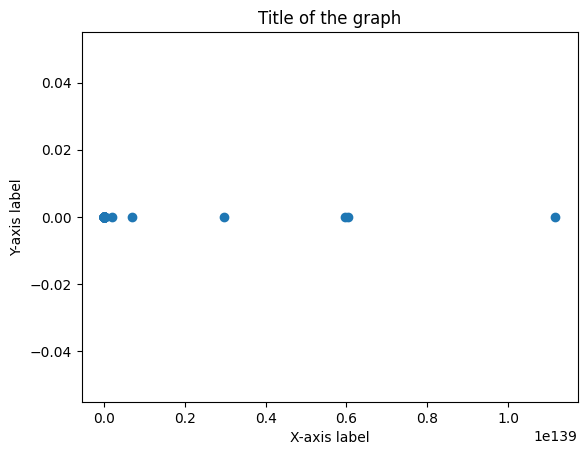

In [14]:
# No need to plot the graph
# But in case you want to see the plotted result
# 

import matplotlib.pyplot as plt

# create a list of numbers
data = nearest_number
# plot the data on a graph
plt.scatter(data, [0 for i in range(len(data))])

# add labels to the graph
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Title of the graph')

# show the graph
plt.show()